In [5]:
import pandas as pd

email_df = pd.read_csv("/content/sample_data/email.csv", encoding="latin-1")
spam_df = pd.read_csv("/content/sample_data/spam.csv", encoding="latin-1")

email_df.head(), spam_df.head()



(  Category                                            Message
 0      ham  Go until jurong point, crazy.. Available only ...
 1      ham                      Ok lar... Joking wif u oni...
 2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3      ham  U dun say so early hor... U c already then say...
 4      ham  Nah I don't think he goes to usf, he lives aro...,
      v1                                                 v2 Unnamed: 2  \
 0   ham  Go until jurong point, crazy.. Available only ...        NaN   
 1   ham                      Ok lar... Joking wif u oni...        NaN   
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
 3   ham  U dun say so early hor... U c already then say...        NaN   
 4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   
 
   Unnamed: 3 Unnamed: 4  
 0        NaN        NaN  
 1        NaN        NaN  
 2        NaN        NaN  
 3        NaN        NaN  
 4        NaN        NaN  )

We loaded two datasets (email.csv and spam.csv) and merged them into one dataset.
Columns were renamed to ensure a consistent structure (label, text).

In [6]:
# ✅ Clean email.csv
email_df = email_df[['Category', 'Message']]   # keep only useful columns
email_df.columns = ['label', 'text']          # rename columns to consistent format

# ✅ Clean spam.csv
# spam.csv usually has columns: v1 (label), v2 (text)
spam_df = spam_df[['v1', 'v2']]
spam_df.columns = ['label', 'text']

# ✅ Combine both datasets into one
combined_df = pd.concat([email_df, spam_df], ignore_index=True)

# Drop rows with missing text
combined_df.dropna(subset=['text'], inplace=True)

combined_df.head()


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


We removed unused columns and dropped rows with missing text.
Final dataset contains 11,145 messages: 9650 ham, 1494 spam.

In [7]:
# Basic dataset overview
combined_df.info()
combined_df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11145 non-null  object
 1   text    11145 non-null  object
dtypes: object(2)
memory usage: 174.3+ KB


,count
label,
ham,9650
spam,1494
"{""mode"":""full""",1


We visualized the distribution of spam vs ham messages.
Result: dataset is imbalanced (spam only ~13%).

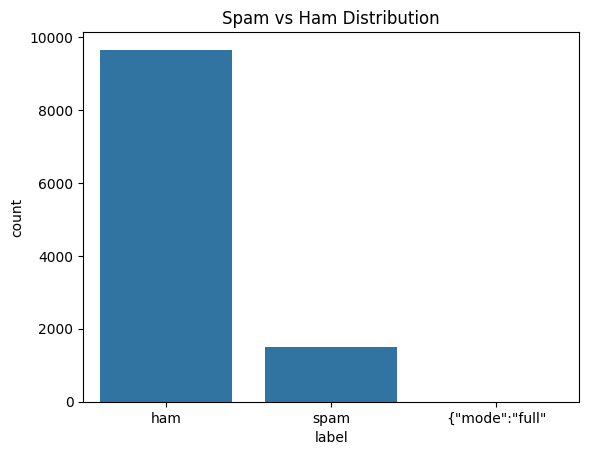

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=combined_df['label'])
plt.title("Spam vs Ham Distribution")
plt.show()


Spam messages tend to be slightly longer than ham messages.

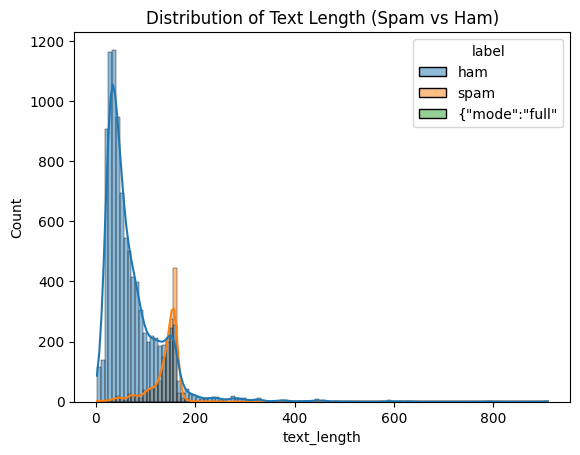

In [9]:
combined_df["text_length"] = combined_df["text"].apply(len)

sns.histplot(data=combined_df, x="text_length", hue="label", kde=True)
plt.title("Distribution of Text Length (Spam vs Ham)")
plt.show()


Spam word cloud shows words like "free", "claim", "win", "txt", "prize"
Ham messages show personal conversational words like "ok", "love", "today", "call"

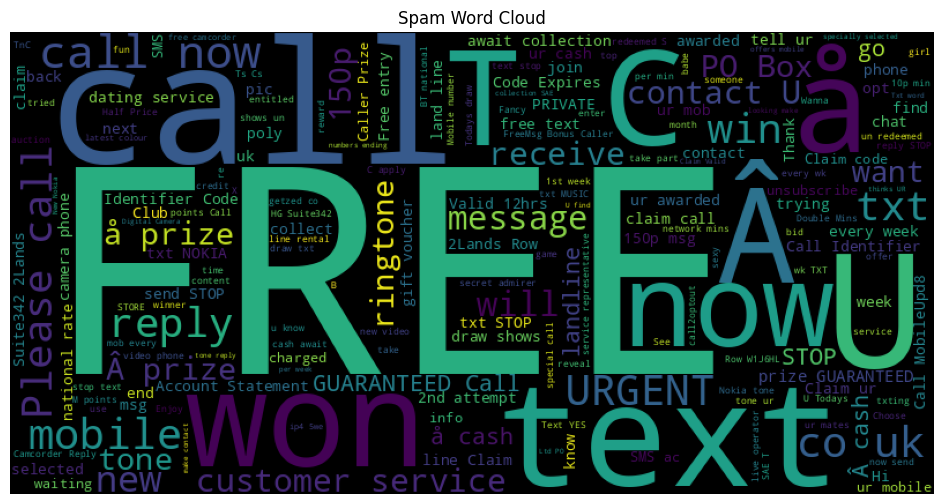

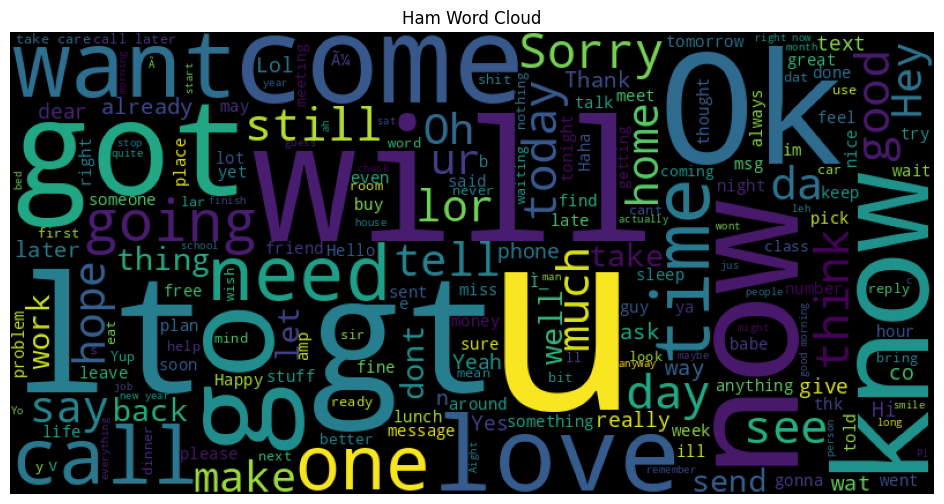

In [10]:
from wordcloud import WordCloud

spam_words = " ".join(combined_df[combined_df["label"]=="spam"]["text"])
ham_words = " ".join(combined_df[combined_df["label"]=="ham"]["text"])

plt.figure(figsize=(12,6))
plt.imshow(WordCloud(width=800, height=400).generate(spam_words))
plt.title("Spam Word Cloud")
plt.axis("off")
plt.show()

plt.figure(figsize=(12,6))
plt.imshow(WordCloud(width=800, height=400).generate(ham_words))
plt.title("Ham Word Cloud")
plt.axis("off")
plt.show()


We extracted the most common words in spam messages.
Words like "free", "txt", "claim", "win" appear most frequently in spam.

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
spam_matrix = cv.fit_transform(combined_df[combined_df['label']=='spam']['text'])

spam_word_counts = pd.DataFrame(spam_matrix.sum(axis=0),
                                columns=cv.get_feature_names_out()).T.sort_values(by=0, ascending=False)

spam_word_counts.head(20)


,0
free,448
txt,326
ur,288
mobile,254
text,250
stop,242
claim,224
reply,208
www,196
prize,184
